In [50]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PoissonRegressor
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.metrics import classification_report,mean_squared_log_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVR

In [9]:
df = pd.read_csv(r"train.csv")

In [3]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [6]:
df['Sex'].unique()

array(['F', 'I', 'M'], dtype=object)

In [4]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
le = LabelEncoder()

In [10]:
df['Sex'] = le.fit_transform(df['Sex'])

In [23]:
df

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...,...
90610,90610,2,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,2,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,1,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,1,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [11]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


<Axes: ylabel='Diameter'>

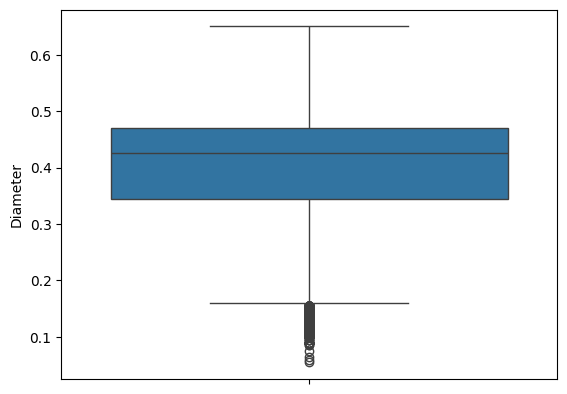

In [15]:
sb.boxplot(df['Diameter'])

<Axes: ylabel='Height'>

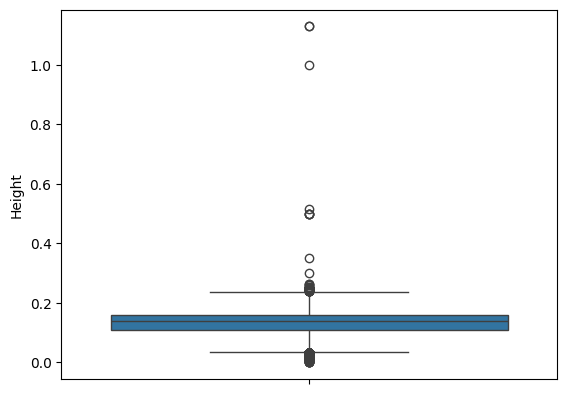

In [16]:
sb.boxplot(df['Height'])

<Axes: ylabel='Shell weight'>

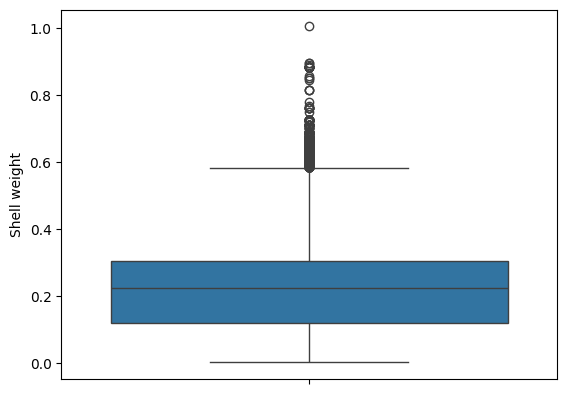

In [17]:
sb.boxplot(df['Shell weight'])

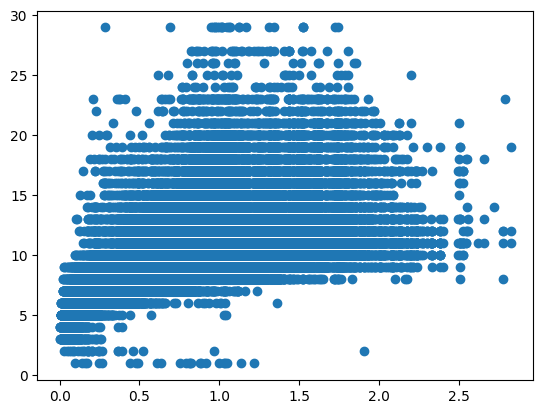

In [20]:
plt.scatter(df["Whole weight"],df['Rings'])

In [21]:
x = df.drop('Rings',axis = 1)

In [22]:
y = df['Rings']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.3,stratify=y)

In [30]:
ps = PoissonRegressor()

In [52]:
params = {'alpha':[0.5,0.6,0.36,0.9,1.0],'solver':['lbfgs', 'newton-cholesky']}

In [53]:
gs = GridSearchCV(ps,param_grid=params,cv=3,verbose = 1,n_jobs=-1)

In [33]:
gs.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=PoissonRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.5, 0.6, 0.36, 0.9, 1.0],
                         'solver': ['lbfgs', 'newton-cholesky']},
             verbose=1)

In [34]:
gs.best_score_

0.4199356094953824

In [35]:
y_pred = gs.predict(x_test)

In [38]:
rmse = mean_squared_log_error(y_test,y_pred,squared=False)

In [39]:
print(rmse)

0.20963791906521528


In [42]:
rff = RandomForestRegressor(max_depth=8)
rff.fit(x_train,y_train)


RandomForestRegressor(max_depth=8)

In [51]:
sv = SVR()

In [54]:
vc = VotingRegressor(estimators=[('random',rff),
                                  ('gridsearch',gs),
                                  ('svr',sv)])

In [55]:
vc.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


VotingRegressor(estimators=[('random', RandomForestRegressor(max_depth=8)),
                            ('gridsearch',
                             GridSearchCV(cv=3, estimator=PoissonRegressor(),
                                          n_jobs=-1,
                                          param_grid={'alpha': [0.5, 0.6, 0.36,
                                                                0.9, 1.0],
                                                      'solver': ['lbfgs',
                                                                 'newton-cholesky']},
                                          verbose=1)),
                            ('svr', SVR())])

In [56]:
vc.score(x_test,y_test)

0.46935613651156727

In [57]:
y_pred = vc.predict(x_test)

In [58]:
print(mean_squared_log_error(y_test,y_pred,squared=False))

0.19503738584628452
